In [2]:
# Import library for file handling
import os

In [3]:
# Import library for data processing
from numpy.random import rand
import pandas as pd

In [13]:
# Import library for plotting
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
def fill_dummy_values(df, scaling_factor):
    # Create copy of dataframe
    df_dummy = df.copy(deep=True)
    # Iterate over each column
    for col in df_dummy:
        # Get column, column missing values and range
        col = df_dummy[col]
        col_null = col.isnull()
        num_nulls = col_null.sum()
        col_range = col.max() - col.min()
        # Shift and scale dummy values
        dummy_values = (rand(num_nulls) - 2)
        dummy_values = dummy_values * scaling_factor * col_range + col.min()
        # Return dummy values
        col[col_null] = dummy_values
    return df_dummy

In [8]:
# Import diabetes file as pandas DataFrame
diabetes = pd.read_csv(os.path.join('00._data', 'pima-indians-diabetes-data.csv'))

In [7]:
!pwd

/home/doniafrizal/GitProject/DataCampProgrammerTrack/03._MissingValueHandling


In [9]:
diabetes.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [10]:
diabetes_dummy = fill_dummy_values(diabetes, 0.075)
nullity = diabetes.Skin_Fold.isnull() + diabetes.BMI.isnull()

/home/doniafrizal/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/doniafrizal/anaconda3/envs/D_datascience-200430-DA/lib/python3.7/site-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


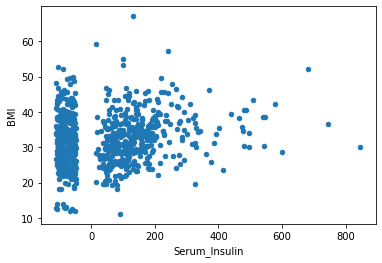

In [11]:
diabetes_dummy.plot(x='Serum_Insulin', y='BMI', kind='scatter')

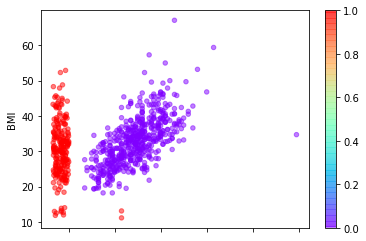

In [14]:
# Create a scatter plot of Skin Fold and BMI 
diabetes_dummy.plot(x='Skin_Fold', y='BMI', kind='scatter', alpha=0.5,
                    
                    # Set color to nullity of BMI and Skin_Fold
                    c=nullity, 
                    cmap='rainbow')

plt.show()